In [1]:
from io import BytesIO

from pydicom import dcmread, dcmwrite
from pydicom.filebase import DicomFileLike

from pydicom.uid import generate_uid
from datetime import datetime
from configparser import ConfigParser

import pandas as pd
import numpy as np

In [2]:
ds = dcmread('DosePlaneTemplate.dcm')

In [3]:
ds.SOPInstanceUID = generate_uid()
ds.file_meta.MediaStorageSOPClassUID = ds.SOPInstanceUID
ds.StudyInstanceUID = generate_uid()
ds.SeriesInstanceUID = generate_uid()
ds.FrameOfReferenceUID = generate_uid(prefix=None)
#ds.PlanReferencedSOPInstanceUID = generate_uid()
ds.StudyDate = datetime.now().strftime('%Y%m%d')
ds.StudyTime = datetime.now().strftime('%H%M%S.%f')
ds.Manufacturer = 'pychromic'
ds.StationName = ''
ds.StudyDescription='Radiohromic Dosimetry'
ds.SeriesDescription='Dose Plane'
ds.PhysiciansOfRecord = ''
ds.ManufacturerModelName = 'chromLit'

config = ConfigParser()
config.read('../config/filmQAp.config')

ds.PatientName = config['Demographics']['PatientFamilyName'] + '^' + config['Demographics']['PatientName']
ds.PatientID = config['Demographics']['PatientId']
ds.PatientBirthDate = ''
ds.PatientBirthTime = ''
ds.PatientSex = config['Demographics']['gender']
ds.OtherPatientIDs = config['Demographics']['patientid']

In [4]:
def write_dataset_to_bytes(dataset):
    # create a buffer
    with BytesIO() as buffer:
        # create a DicomFileLike object that has some properties of DataSet
        memory_dataset = DicomFileLike(buffer)
        # write the dataset to the DicomFileLike object
        dcmwrite(memory_dataset, dataset)
        # to read from the object, you have to rewind it
        memory_dataset.seek(0)
        # read the contents as bytes
        return memory_dataset.read()

In [5]:
dcmbinaryfile = write_dataset_to_bytes(ds)

In [5]:
ncols = len(pd.read_csv('Film.dxf', header=48, sep='\t', index_col=False, nrows=1).columns)
ddf = pd.read_csv('Film.dxf', header=48, sep='\t', names=np.arange(ncols))

In [6]:
import matplotlib.pyplot as plt 

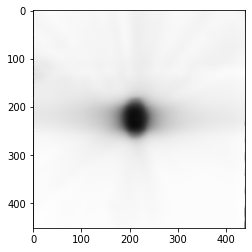

In [7]:
plt.imshow(ddf.values, cmap=plt.cm.gray_r)

In [79]:
ddf.values.max()

5.8

In [6]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: 1.2.826.0.1.3680043.8.498.39322032072284680763348044740344904833
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.246.352.71.7.964456977994.477809.20220623120601
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.7
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0012) Instance Creation Date              DA: '20220623'
(0008, 0013) Instance Creation Time              TM: '120601.334000'
(0008, 0016) SOP Class UID                       UI: RT Dose Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.39322032072284680763348044740344904833
(0008, 0020) Stu

In [8]:
%cd ..

/Users/cesar/Documents/Development/demoStFQA/stFilmQAp


In [9]:
from pyfilmqa import dcmWriter

In [11]:
dcmWriter(Data=ddf.values, imfile='Film.tif', config=config)

/Users/cesar/Documents/Development/fd1a/lib/python3.9/site-packages/pydicom/valuerep.py:290: UserWarning: The value length (21) exceeds the maximum length of 16 allowed for VR DS. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00DICM\x02\x00\x00\x00UL\x04\x00\xc8\x00\x00\x00\x02\x00\x01\x00OB\x00\x00\x02\x00\x00\x00\x00\x01\x02\x00\x02\x00UI@\x001.2.826.0.1.3680043.8.498.82922285805430949689756828993085364567\x02\x00\x03\x00UI4\x001.2.246.352.71.7.964456977994.477809.20220623120601\x00\x02\x00\x10\x00UI\x12\x001.2.840.10008.1.2\x00\x02\x00\x12\x00UI\x14\x001.2.246.352.70.2.1.7\x08\x00\x05\x00\n\x00\x00\x00ISO_IR 192\x08\x00\x12\x00\x08\x00\x00\x0020220623\x08\x00\x13\x00\x0e\x00\x00\x00120601.334000 \x08\x

In [22]:
ddf.values

array([[0.11, 6.  , 0.29, ..., 0.22, 0.2 , 0.34],
       [0.7 , 6.  , 0.32, ..., 0.23, 0.21, 0.35],
       [0.07, 4.81, 0.28, ..., 0.23, 0.2 , 0.36],
       ...,
       [0.  , 0.15, 6.  , ..., 0.05, 0.01, 0.16],
       [0.  , 0.15, 6.  , ..., 0.04, 0.  , 0.27],
       [0.  , 0.15, 6.  , ..., 0.04, 0.  , 0.28]])

In [10]:
%cd img_dir/

/Users/cesar/Documents/Development/demoStFQA/stFilmQAp/img_dir


In [24]:
config